In [6]:
#import the required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
#load the dataset

train_loan = pd.read_csv("C:/Users/Shweta/Desktop/Data Science/Python Data Science/dataset/Loan Prediction/train.csv")
test_loan = pd.read_csv("C:/Users/Shweta/Desktop/Data Science/Python Data Science/dataset/Loan Prediction/test.csv")

#Data Cleaning
1.check the data ie, features names and values
2. check for missing values
3. Impute the missing values
4. Remove the unwanted characters
5.check for outliers
6. variable data transformation
7. categorial variable tranformation


In [8]:
#the dimension of the train and test set

print(train_loan.shape)
print(test_loan.shape)

(614, 13)
(367, 12)


In [9]:
#explore the dataset

print(train_loan.head())
print(test_loan.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [10]:
#statistical inferences of the variable

print(train_loan.describe())
print(test_loan.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         36

In [11]:
#for train dataset

#check for missing values and impute it, in trainset
#print(train_loan.isna().sum())
train_loan['Gender'] = train_loan['Gender'].fillna( train_loan['Gender'].dropna().mode().values[0] )
train_loan['Married'] = train_loan['Married'].fillna( train_loan['Married'].dropna().mode().values[0] )
train_loan['Dependents'] = train_loan['Dependents'].fillna( train_loan['Dependents'].dropna().mode().values[0] )
train_loan['Self_Employed'] = train_loan['Self_Employed'].fillna( train_loan['Self_Employed'].dropna().mode().values[0] )
train_loan['LoanAmount'] = train_loan['LoanAmount'].fillna( train_loan['LoanAmount'].dropna().mode().values[0] )
train_loan['Loan_Amount_Term'] = train_loan['Loan_Amount_Term'].fillna( train_loan['Loan_Amount_Term'].dropna().mode().values[0])
train_loan['Credit_History'] = train_loan['Credit_History'].fillna( train_loan['Credit_History'].dropna().mode().values[0] )
print(train_loan.isna().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [12]:
#remove the unwanted characters
train_loan['Dependents']= train_loan.Dependents.apply(lambda x: x.strip('+'))
train_loan['Dependents'] = train_loan['Dependents'].astype(np.int)

In [13]:
##check for missing values and impute it, for test dataset

#print(train_loan.isna().sum())
test_loan['Gender'] = test_loan['Gender'].fillna( test_loan['Gender'].dropna().mode().values[0] )
test_loan['Married'] = test_loan['Married'].fillna( test_loan['Married'].dropna().mode().values[0] )
test_loan['Dependents'] = test_loan['Dependents'].fillna( test_loan['Dependents'].dropna().mode().values[0] )
test_loan['Self_Employed'] = test_loan['Self_Employed'].fillna( test_loan['Self_Employed'].dropna().mode().values[0] )
test_loan['LoanAmount'] = test_loan['LoanAmount'].fillna( test_loan['LoanAmount'].dropna().mode().values[0] )
test_loan['Loan_Amount_Term'] = test_loan['Loan_Amount_Term'].fillna( test_loan['Loan_Amount_Term'].dropna().mode().values[0])
test_loan['Credit_History'] = test_loan['Credit_History'].fillna( test_loan['Credit_History'].dropna().mode().values[0] )
print(test_loan.isna().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [14]:
#categorical variable transformation with datatype conversion
#for trrain dataset

#df['Dependents'] = df['Dependents'].str.rstrip('+')
train_loan['Gender'] = train_loan['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train_loan['Married'] = train_loan['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train_loan['Education'] = train_loan['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train_loan['Self_Employed'] = train_loan['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train_loan['Loan_Status'] = train_loan['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
train_loan['Property_Area'] = train_loan['Property_Area'].map({'Rural':0, 'Urban':2, 'Semiurban':1}).astype(np.int)
#df['Dependents'] = df['Dependents'].astype(np.int)

In [15]:
#categorical variable transformation with datatype conversion
#for test dataset
test_loan['Gender'] = test_loan['Gender'].map({'Female':0,'Male':1}).astype(np.int)
test_loan['Married'] = test_loan['Married'].map({'No':0, 'Yes':1}).astype(np.int)
test_loan['Education'] = test_loan['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
test_loan['Self_Employed'] = test_loan['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
test_loan['Property_Area'] = test_loan['Property_Area'].map({'Rural':0, 'Urban':2, 'Semiurban':1}).astype(np.int)

In [16]:
#remove the unwanted characters
test_loan['Dependents']= test_loan.Dependents.apply(lambda x: x.strip('+'))
test_loan['Dependents'] = test_loan['Dependents'].astype(np.int)

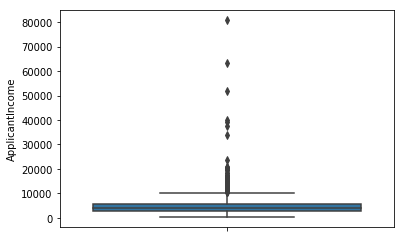

In [11]:
#check for outliers
import seaborn as sns
sns.boxplot(y='ApplicantIncome', data=train_loan)

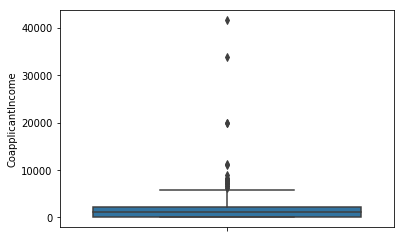

In [12]:
sns.boxplot(y='CoapplicantIncome', data=train_loan)

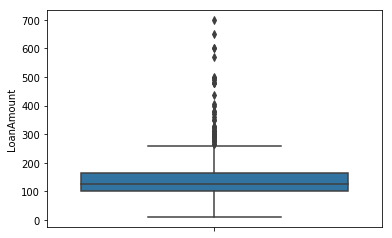

In [13]:
sns.boxplot(y='LoanAmount', data=train_loan)

In [ ]:
#Removing the outliers
#beyond the range of -1.5 x IQR to 1.5 x IQR
from scipy.stats import iqr
IQR = iqr(train_loan['ApplicantIncome'])
median = train_loan['ApplicantIncome'].mean()
train_loan['ApplicantIncome'] = np.where(train_loan['ApplicantIncome'] > 1.5*IQR, median,train_loan['ApplicantIncome'])
train_loan['ApplicantIncome'] = np.where(train_loan['ApplicantIncome'] <(-1.5)*IQR, median,train_loan['ApplicantIncome'])
#train_loan['ApplicantIncome']= [x for x in train_loan['ApplicantIncome'] if (x > (-1.5)*IQR)]
#train_loan['ApplicantIncome'] = [x for x in train_loan['ApplicantIncome'] if (x < 1.5*IQR)]

In [ ]:
#beyond the range of -1.5 x IQR to 1.5 x IQR
from scipy.stats import iqr
IQR = iqr(train_loan['CoapplicantIncome'])
median = train_loan['CoapplicantIncome'].mean()
train_loan['CoapplicantIncome'] = np.where(train_loan['CoapplicantIncome'] > 1.5*IQR, median,train_loan['CoapplicantIncome'])
train_loan['CoapplicantIncome'] = np.where(train_loan['CoapplicantIncome'] <(-1.5)*IQR, median,train_loan['CoapplicantIncome'])

In [ ]:
#beyond the range of -1.5 x IQR to 1.5 x IQR
from scipy.stats import iqr
IQR = iqr(test_loan['ApplicantIncome'])
median = test_loan['ApplicantIncome'].mean()
test_loan['ApplicantIncome'] = np.where(test_loan['ApplicantIncome'] > 1.5*IQR, median,test_loan['ApplicantIncome'])
test_loan['ApplicantIncome'] = np.where(test_loan['ApplicantIncome'] <(-1.5)*IQR, median,test_loan['ApplicantIncome'])
IQR = iqr(test_loan['CoapplicantIncome'])
median = test_loan['CoapplicantIncome'].mean()
test_loan['CoapplicantIncome'] = np.where(test_loan['CoapplicantIncome'] > 1.5*IQR, median,test_loan['CoapplicantIncome'])
test_loan['CoapplicantIncome'] = np.where(test_loan['CoapplicantIncome'] <(-1.5)*IQR, median,test_loan['CoapplicantIncome'])

2. Data Exploration
- data visualization among the different variables

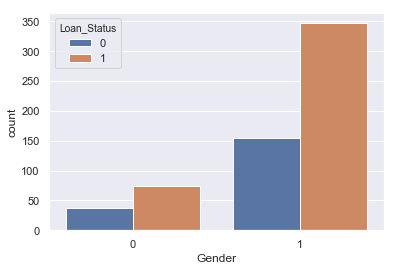

In [264]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="Gender", hue= "Loan_Status", data=train_loan)

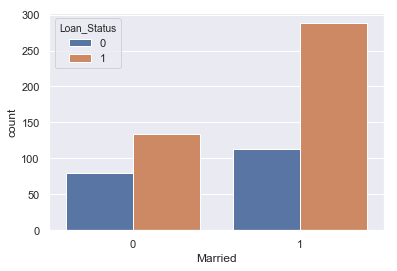

In [265]:
sns.countplot(x="Married", hue= "Loan_Status", data=train_loan)

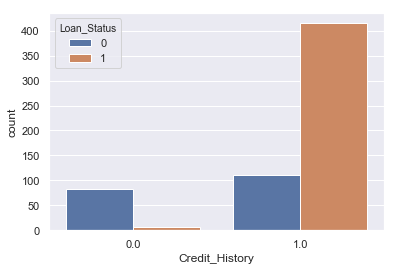

In [266]:
sns.countplot(x="Credit_History", hue= "Loan_Status", data=train_loan)

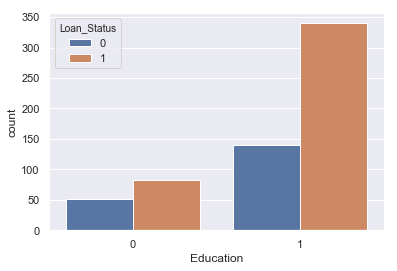

In [267]:
sns.countplot(x="Education", hue= "Loan_Status", data=train_loan)

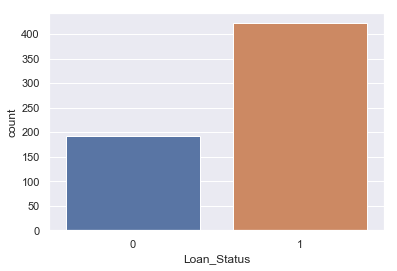

In [268]:
#data visualization

sns.countplot(train_loan['Loan_Status'], label='count')

In [269]:
#check for the description of dataset after dat cleaning

print(train_loan.info())
print()
print()
print()
print(test_loan.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null float64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int32
Loan_Status          614 non-null int32
dtypes: float64(5), int32(7), object(1)
memory usage: 45.6+ KB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null int32
Married              367 non-null int32
Dependents           367 non-null int32
Education            367 no

3.Data Splitting
-identify the x and y ie, x-independent variable and y - dependent variable
-split the train_loan into train and test data 

In [19]:
#data splitiing
#train_loan=train_loan.drop(['Loan_ID'],axis=1, inplace = True)
x= train_loan.iloc[:,1:12]
y= train_loan.iloc[:,12]
train_x,test_x, train_y,test_y=train_test_split(x,y,test_size=0.3)
#random state is excluded so as to see the variation in accuracy among diff models other wise it will give same accuracy.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(429, 11)
(429,)
(185, 11)
(185,)


In [ ]:
4.Model Building
1. Logistic Regression-the dependent varaiable is categorical in nature we use logistic Regression
2. XGboost 
3. GridSearch CV

In [20]:
#Model Building

from sklearn.metrics import accuracy_score
model_Logistic=LogisticRegression()
model_Logistic.fit(train_x,train_y)# now fit our model for traiing data
prediction_1=model_Logistic.predict(test_x)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(accuracy_score(prediction_1,test_y))

        

C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8216216216216217


In [21]:
#XGboost Regressor

import xgboost as xgb
xg = xgb.XGBClassifier(learning_rate =0.1, n_estimators=170, max_depth= 5, min_child_weight=4, gamma=0.1, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic')
xg.fit(train_x, train_y)
preds = xg.predict(test_x)
accuracy_score(preds,test_y)

0.7675675675675676

In [22]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV

max_depth= list(range(4,10,2))
min_child_weight =[3,5,6,9,12]
gamma= [0.1,0.2,0.3,0.4]
subsample= [i/10.0 for i in range(7,10)]
colsample_bytree = [i/10.0 for i in range(7,10)]


param_grid = dict(max_depth= max_depth, min_child_weight = min_child_weight,
                  gamma= gamma, subsample= subsample, colsample_bytree = colsample_bytree)

grid = GridSearchCV(estimator=xg, param_grid=param_grid, cv = 4, n_jobs=-1)

grid_result = grid.fit(train_x,train_y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.778555 using {'colsample_bytree': 0.7, 'gamma': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.8}


In [23]:
xg = xgb.XGBClassifier(learning_rate =0.1, n_estimators=170, max_depth= 4, min_child_weight=6 , gamma= 0.4, subsample=0.8,
                     colsample_bytree= 0.7, objective= 'binary:logistic')
xg.fit(train_x, train_y)
print(xg.score(test_x, test_y))
preds = xg.predict(test_x)
print(accuracy_score(preds,test_y))

0.8108108108108109
0.8108108108108109


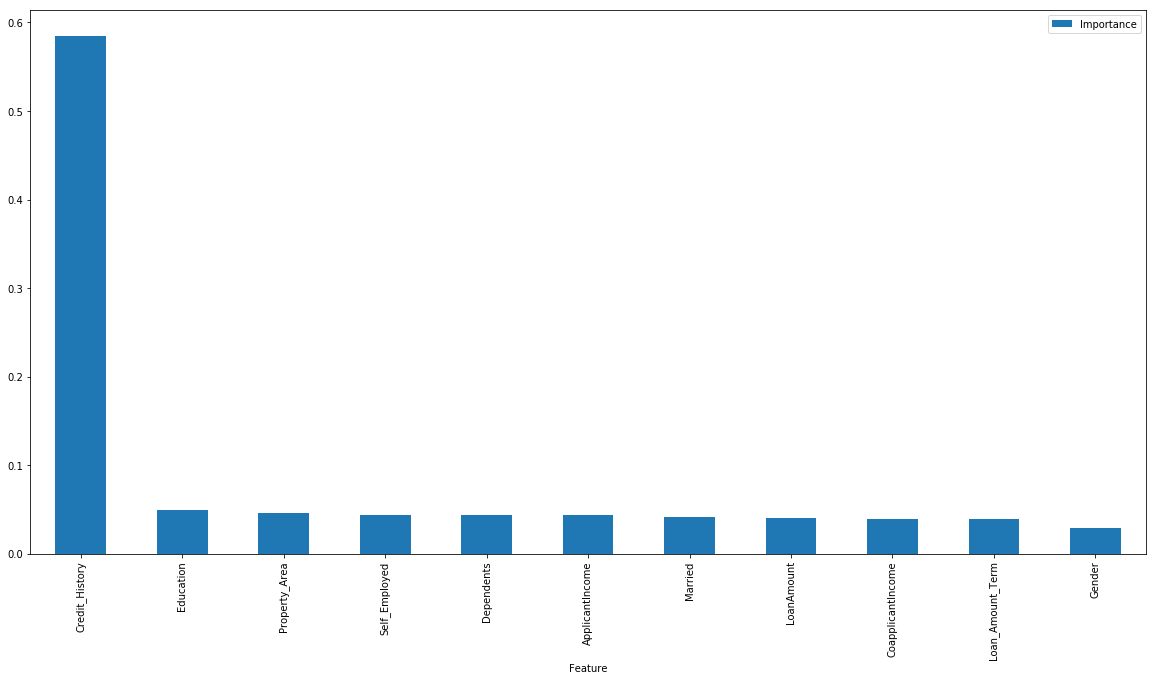

In [78]:
#check the importance of the features

features = pd.DataFrame()
features['Feature'] = train_x.columns
features['Importance'] = xg.feature_importances_
    

features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)
features.plot(kind='bar', figsize=(20, 10))

In [24]:
z= test_loan['Loan_ID']
#drop the loan_ID as it is not required in the anlaysis
test_loan.drop(['Loan_ID'],axis=1,inplace=True)

In [46]:
print(test_loan.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [25]:
#predict the test set
prediction= model_Logistic.predict(test_loan)# predict for the test data
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [26]:
#save the prediction in .csv file
output= pd.DataFrame()
output['Loan_Status'] = prediction
output['Loan_ID'] = z
output['Loan_Status'].replace(0, 'N',inplace=True) 
output['Loan_Status'].replace(1, 'Y',inplace=True)
output.to_csv('my_submission.csv', index=False)